## plotting the data

In [0]:
#plotting the training data
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

x1  = data[:, 0]
x2  = data[:, 1]
label   = data[:, 2]

x1_label0 = x1[label == 0]
x2_label0 = x2[label == 0]

x1_label1 = x1[label == 1]
x2_label1 = x2[label == 1]

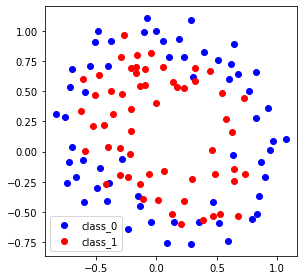

In [49]:
# data plotting
plt.figure()
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') #label0은 blue
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label1은 red
plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
# data
data = np.array([x1,x2,label])

In [0]:
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
m = y.size

In [0]:
# X에는 1을 가지는 열을 삽입한다(interception계산을 위해)
X = np.insert(X,0,1,axis=1)

## Plot the training error with varying regularization parameters

In [0]:
#저번주와 다른 점은 tehta가 100개가 나와야 한다는 점, 
def NewFeatureMake(n, x1,x2):
    # 차수 n으로 정의
    # X의 첫 열은 1로 이루어진 열 for intercept 
    out = np.ones( (x1.shape[0], 1) )

    # 각 차수별로 가능한 모든 수식을 작성하기 위한 이중 for문 
    for i in range(0, n+1):
        for j in range(0, n+1):
            if not (i==0 and j==0) :
              first_seq = x1 ** (i)
              second_seq = x2 ** (j)
              final = (first_seq * second_seq).reshape( first_seq.shape[0], 1 ) 
              out = np.hstack(( out, final )) # feature으로 이루어진 X 행렬 생성 
              #print(i, j,"\n") # 몇차에 해당하는 theta값인지를 확인하기 위한 출력 
    return out

In [355]:
new_X = NewFeatureMake(9, X[:,1],X[:,2])
new_X.shape

(118, 100)

In [0]:
#X벡터값과 theta값을 받았을 때 도출할 수 있는 logistic model
def h(theta, X):
  z = np.dot(X,theta)
  return 1./(np.exp(-z)+1)

In [0]:
#Objective function
#여기서의 L은 lambda값을 의미한다. = regularization term
def ObjectiveFunc(theta, X, y, m, L):
  for_0 = np.dot(-np.array(y).T,np.log(h(theta,X)))
  for_1 = np.dot((1-np.array(y)).T,np.log(1-h(theta,X)))
  regularization = (L/2)*(np.sum(np.dot(theta[1:].T, theta[1:]))) #biased term은 포함x
  return float( (1./m) * ( np.sum(for_0 - for_1) + regularization ) )

In [0]:
# accuracy 정의 
# y를 y로 input하면 y.flatten-> y이어야 하고, y를 label로 input하려면 y.flatten으로 유지해야 한다. 
def accuracy(X, y,theta,threshold=0.5):
  pred = (h(theta, X)>=threshold).astype(int) #예측한 값
  acc = np.mean(pred.flatten() == y.flatten()) # 실제값과 같은지를 비교하여 전체 len으로 나눔 
  return acc * 100

In [0]:
# Gradient descent using ObjectiveFunc
# add regularization term

iteration = 500000 # hyperparameter
alpha = 0.014

def GradientDescent(X,y,Theta,m, L):
    #plotting위해 저장하는 history
    J_history = [] 
    acc_history = []
    #theta_history = []

    #iteration
    for i in range(iteration):
        tmp = Theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        #history값 저장 
        J_history.append(ObjectiveFunc(Theta,X,y,m,L))
        acc_history.append(accuracy(X,y,Theta))
        #theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):

          tmp[j] = Theta[j]*(1-alpha*L/m) - (alpha/m)*np.sum((h(Theta,X) - y)*np.array(X[:,j]).reshape(m,1))
          #tmp[j] = Theta[j] - (alpha/m)*( (np.sum( (h(Theta,X) - y)*np.array(X[:,j]).reshape(m,1)) + L*Theta[j] ))
        Theta = tmp 
    return Theta, acc_history, J_history

In [0]:
# lambda값 임의로 지정 
L = 0
L1 = 6
L2 = 15

In [0]:
#theta초깃값 (0으로 주는 경우 )
theta=np.zeros((new_X.shape[1],1))

In [0]:
# Gradient descent계산 (lambda = 0 ): overfitting의 경우 
theta, acc_history, J_history = GradientDescent(new_X,y, theta,m, L)

In [0]:
#새로운 초깃값 
theta1=np.zeros((new_X.shape[1],1))

In [0]:
# Gradient descent계산 (lambda = 10 ): Just right의 경우 
theta1, acc_history1, J_history1 = GradientDescent(new_X,y, theta1,m, L1)

In [0]:
#새로운 초깃값 
theta2=np.zeros((new_X.shape[1],1))

In [0]:
# Gradient descent계산 (lambda = 30 ): underfitting의 경우 
theta2, acc_history2, J_history2 = GradientDescent(new_X,y, theta2,m, L2)

## train cost

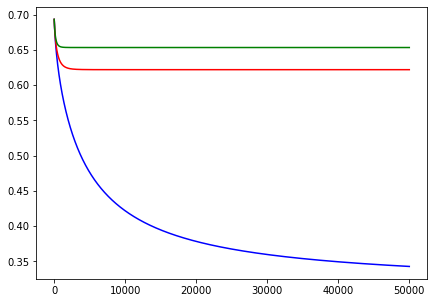

In [543]:
# cost값 plotting
plt.figure(figsize=(7, 5))
plt.plot(range(len(J_history)),J_history,'b') #lambda = 0
plt.plot(range(len(J_history1)),J_history1,'r') #lambda = 6
plt.plot(range(len(J_history2)),J_history2,'g') #lambda = 15

In [518]:
print(J_history[-1], J_history1[-1], J_history2[-1]) # 마지막 train cost값

0.34280960614513023 0.6217975404917866 0.6532113587683009


## accuracy plotting

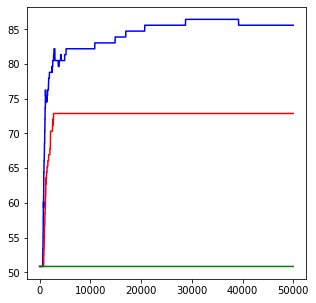

In [519]:
# 각 iteration 마다 모든 accuracy를 출력한다. 
plt.figure(figsize=(5, 5))
plt.plot(range(len(acc_history)),acc_history,'b')
plt.plot(range(len(acc_history1)),acc_history1,'r')
plt.plot(range(len(acc_history2)),acc_history2,'g')

## plot the classifier

In [0]:
# x좌표의 x1값, y좌표의 x2값에 대한 범위를 지정 
x1_range = np.linspace(-1,1)
x2_range = np.linspace(-1,1)

In [521]:
# 생성한 새로운 차수를 담을 새로운 array 초기화 
z_range = np.zeros((len(x1_range), len(x2_range)))
z_range.shape

(50, 50)

In [0]:
# z값은 결국 g()=0에 해당하는 line을 그리고자 하는 형태이다. 
# 해당 x1,x2값에 대해 동일한 class를 가지는 값을 표현하면 된다. 
# 여기서 theta는 이미 optimized된 theta값이다. 
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        New_dim_Feat = NewFeatureMake(9, np.array([x1_range[i]]),np.array([x2_range[j]]))
        z_range[i][j] = np.dot(theta.T,New_dim_Feat.T) #행렬형태주의 
z_range = z_range.transpose() #행렬형태주의

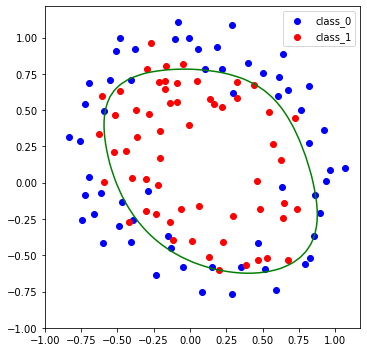

In [523]:
#boundary plotting
plt.figure(figsize=(8,5))
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
#boundary_plotting = plt.contour(X1_range, X2_range, z_range.T)
#하나의 등고선만을 표현 
boundary_plotting = plt.contour(X1_range, X2_range, z_range.T,[0],colors='green')

#data plotting
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') # label이 0인 값들
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label이 1인 값들
plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

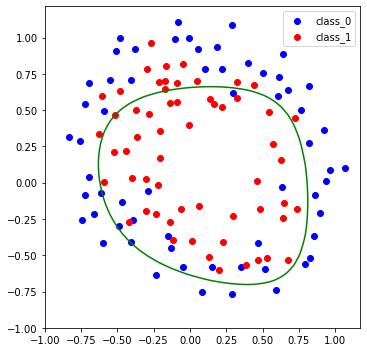

In [524]:
# theta1에 대한 값. 즉 lambda = 10인 경우 boundary plotting 
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        New_dim_Feat = NewFeatureMake(9, np.array([x1_range[i]]),np.array([x2_range[j]]))
        z_range[i][j] = np.dot(theta1.T,New_dim_Feat.T) #행렬형태주의 

z_range = z_range.transpose() #행렬형태주의
#boundary plotting
plt.figure(figsize=(8,5))
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
#boundary_plotting = plt.contour(X1_range, X2_range, z_range.T)
#하나의 등고선만을 표현 
boundary_plotting = plt.contour(X1_range, X2_range, z_range.T,[0],colors='green')

#data plotting
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') # label이 0인 값들
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label이 1인 값들
plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

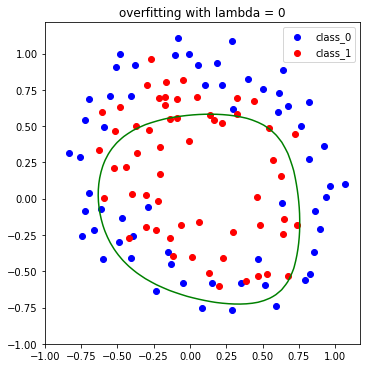

In [525]:
# z값은 결국 g()=0에 해당하는 line을 그리고자 하는 형태이다. 
# 해당 x1,x2값에 대해 동일한 class를 가지는 값을 표현하면 된다. 
# 여기서 theta 는 이미 optimized된 theta값이다. 

for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        New_dim_Feat = NewFeatureMake(9, np.array([x1_range[i]]),np.array([x2_range[j]]))
        z_range[i][j] = np.dot(theta2.T,New_dim_Feat.T) #행렬형태주의 
z_range = z_range.transpose() #행렬형태주의
#boundary plotting
plt.figure(figsize=(8,5))
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
#boundary_plotting = plt.contour(X1_range, X2_range, z_range.T)
#하나의 등고선만을 표현 
boundary_plotting = plt.contour(X1_range, X2_range, z_range.T,[0],colors='green')

#data plotting
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') # label이 0인 값들
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label이 1인 값들
plt.tight_layout()
plt.legend()
plt.title('overfitting with lambda = 0')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 답

## 1. Plot the training data

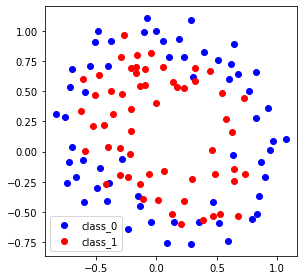

In [526]:
# data plotting
plt.figure()
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') #label0은 blue
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label1은 red
plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2. Plot the training errer with varying regularization parameter

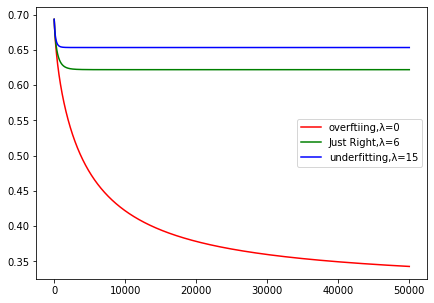

In [530]:
# cost값 plotting
plt.figure(figsize=(7, 5))
plt.plot(range(len(J_history)),J_history,'r',label = 'overftiing,λ=0') #lambda = 0인 경우 : overfitting
plt.plot(range(len(J_history1)),J_history1,'g', label ='Just Right,λ=6') #lambda = 3인 경우 : Just right
plt.plot(range(len(J_history2)),J_history2,'b', label = 'underfitting,λ=15') #lambda = 15인 경우 : underfitting
plt.legend()
plt.show()

## 3. Display the values of the chosen regularization parameters

In [532]:
from termcolor import colored
print(colored(L, 'red')) #overfitting일 때 람다값 

0


In [533]:
print(colored(L1, 'green')) #Just right일 때 람다값 

6


In [536]:
print(colored(L2, 'blue')) #underfitting일 때 람다값 

15


## 4. Plot the training accuracy with varying regularization parameters

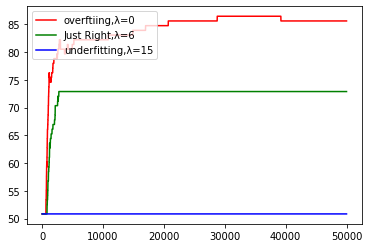

In [531]:
# 각 iteration 마다 모든 accuracy를 출력한다. 
plt.plot(range(len(acc_history)),acc_history,'r',label = 'overftiing,λ=0')
plt.plot(range(len(acc_history1)),acc_history1,'g',label = 'Just Right,λ=6')
plt.plot(range(len(acc_history2)),acc_history2,'b',label = 'underfitting,λ=15')
plt.legend()
plt.show()

## 5. Display the final training accuracy with varying regularization parameters

In [537]:
from termcolor import colored
print(colored(acc_history[-1], 'red'),'%')

85.59322033898306 %


In [538]:
print(colored(acc_history1[-1],'green'),'%')

72.88135593220339 %


In [539]:
print(colored(acc_history2[-1],'blue'), '%')

50.847457627118644 %


## 6. Plot the optimal classiier with varying regularization parameters superimposed on the training data.

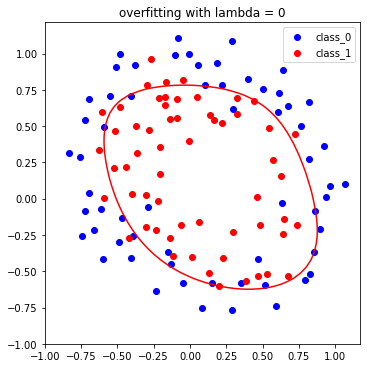

In [540]:
# z값은 결국 g()=0에 해당하는 line을 그리고자 하는 형태이다. 
# 해당 x1,x2값에 대해 동일한 class를 가지는 값을 표현하면 된다. 
# 여기서 theta는 이미 optimized된 theta값이다. 
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        New_dim_Feat = NewFeatureMake(9, np.array([x1_range[i]]),np.array([x2_range[j]]))
        z_range[i][j] = np.dot(theta.T,New_dim_Feat.T) #행렬형태주의 
z_range = z_range.transpose() #행렬형태주의

#boundary plotting
plt.figure(figsize=(8,5))
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
#boundary_plotting = plt.contour(X1_range, X2_range, z_range.T)
#하나의 등고선만을 표현 
boundary_plotting = plt.contour(X1_range, X2_range, z_range.T,[0],colors='red')

#data plotting
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') # label이 0인 값들
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label이 1인 값들
plt.tight_layout()
plt.legend()
plt.title('overfitting with lambda = 0')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

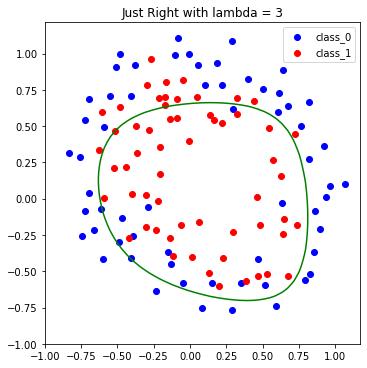

In [541]:
# theta1에 대한 값. 즉 lambda = 10인 경우 boundary plotting 
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        New_dim_Feat = NewFeatureMake(9, np.array([x1_range[i]]),np.array([x2_range[j]]))
        z_range[i][j] = np.dot(theta1.T,New_dim_Feat.T) #행렬형태주의 

z_range = z_range.transpose() #행렬형태주의
#boundary plotting
plt.figure(figsize=(8,5))
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
#boundary_plotting = plt.contour(X1_range, X2_range, z_range.T)
#하나의 등고선만을 표현 
boundary_plotting = plt.contour(X1_range, X2_range, z_range.T,[0],colors='green')

#data plotting
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') # label이 0인 값들
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label이 1인 값들
plt.tight_layout()
plt.legend()
plt.title('Just Right with lambda = 3')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

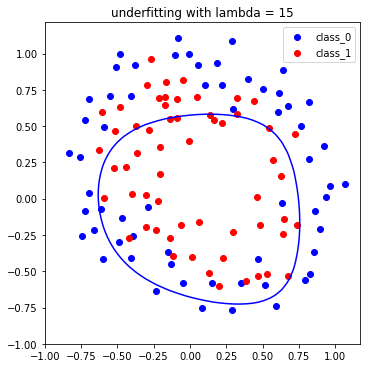

In [542]:
# z값은 결국 g()=0에 해당하는 line을 그리고자 하는 형태이다. 
# 해당 x1,x2값에 대해 동일한 class를 가지는 값을 표현하면 된다. 
# 여기서 theta 는 이미 optimized된 theta값이다. 

for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        New_dim_Feat = NewFeatureMake(9, np.array([x1_range[i]]),np.array([x2_range[j]]))
        z_range[i][j] = np.dot(theta2.T,New_dim_Feat.T) #행렬형태주의 
z_range = z_range.transpose() #행렬형태주의
#boundary plotting
plt.figure(figsize=(8,5))
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
#boundary_plotting = plt.contour(X1_range, X2_range, z_range.T)
#하나의 등고선만을 표현 
boundary_plotting = plt.contour(X1_range, X2_range, z_range.T,[0],colors='blue')

#data plotting
plt.scatter(x1_label0, x2_label0, c='b',label='class_0') # label이 0인 값들
plt.scatter(x1_label1, x2_label1, c='r',label='class_1') #label이 1인 값들
plt.tight_layout()
plt.legend()
plt.title('underfitting with lambda = 15')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()